Matplotlib is building the font cache; this may take a moment.


Środek danych (x̄, ȳ): [2.02574636 2.06413725]
Macierz kowariancji:
 [[ 7.96109211 -6.60080765]
 [-6.60080765  5.47295032]]
Wartości własne: [1.34340424e+01 8.88178420e-16]
Wektory własne (kolumny):
 [[ 0.76980897  0.63827435]
 [-0.63827435  0.76980897]]
Główna oś (wektor własny): [ 0.76980897 -0.63827435]
Kąt obrotu (stopnie): -39.6632624971926


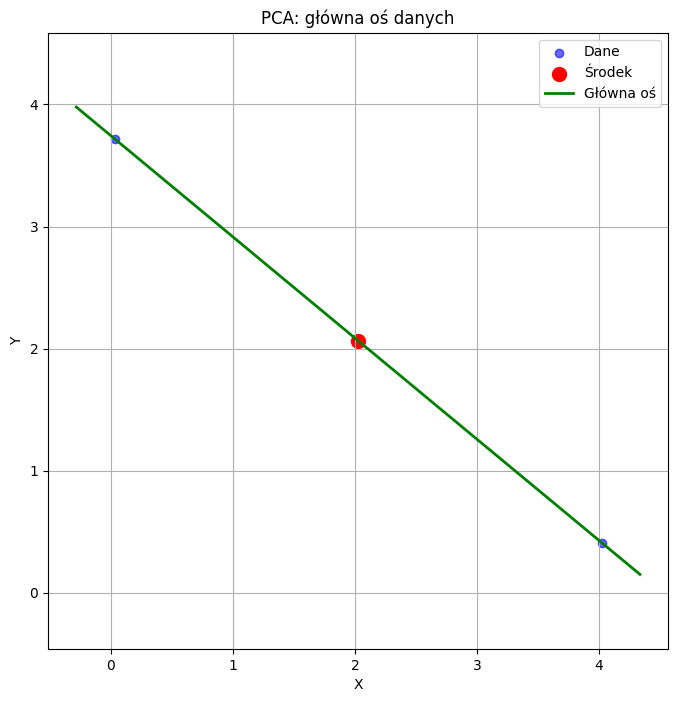

In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

data = pd.read_csv("9.csv", header=None)

x = data.iloc[:, 0]
y = data.iloc[:, 1]

x_mean = x.mean()
y_mean = y.mean()
center = np.array([x_mean, y_mean])
print("Środek danych (x̄, ȳ):", center)

X_centered = data.iloc[:, :2] - center

cov_matrix = np.cov(X_centered.T)
print("Macierz kowariancji:\n", cov_matrix)

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print("Wartości własne:", eig_vals)
print("Wektory własne (kolumny):\n", eig_vecs)

max_index = np.argmax(eig_vals)
principal_axis = eig_vecs[:, max_index]
print("Główna oś (wektor własny):", principal_axis)

angle = math.degrees(math.atan2(principal_axis[1], principal_axis[0]))
print("Kąt obrotu (stopnie):", angle)

# --------------------------
# Wykres
# --------------------------
plt.figure(figsize=(8, 8))
plt.scatter(x, y, label='Dane', color='blue', alpha=0.6)

plt.scatter(x_mean, y_mean, color='red', label='Środek', s=100)

scale = 3 
plt.plot([x_mean - scale*principal_axis[0], x_mean + scale*principal_axis[0]],
         [y_mean - scale*principal_axis[1], y_mean + scale*principal_axis[1]],
         color='green', label='Główna oś', linewidth=2)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('PCA: główna oś danych')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()
